In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

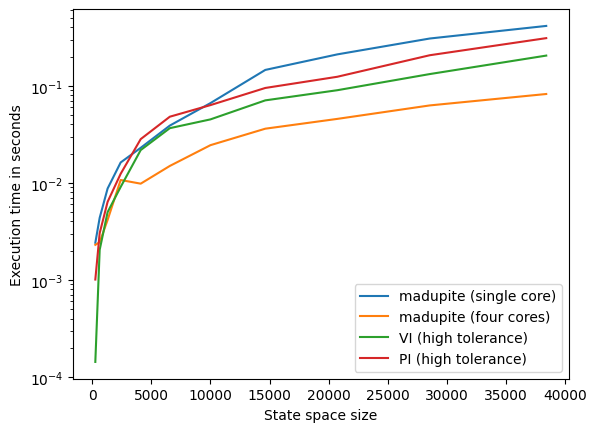

In [44]:

aitime = np.loadtxt("aitoolboxexectime1e-6.csv", skiprows=1, delimiter=",")
aitime = aitime[0:15]
aitime2 = np.loadtxt("aitoolboxexectime1e-5.csv", skiprows=1, delimiter=",")
aitime2 = aitime2[0:15]
fig, ax1 = plt.subplots()
y = np.zeros((aitime[:, 0].shape[0], 6))
y[:, 2:4] = aitime[:, 1:3] / 1000
y[:, 4:6] = aitime2[:, 1:3] / 1000
for square_size in aitime[:, 0]:
    for i in range(10):
        with open(str(int(square_size)) + "/singlecore" + str(i) + "/metadata.json") as f:
            y[int(square_size - aitime[0, 0]), 0] += json.load(f)["residual log"][-1][
                "time"
            ]
        with open("./"+str(int(square_size)) + "/fourcore" + str(i) + "/metadata.json") as f:
            y[int(square_size - aitime[0, 0]), 1] += json.load(f)["residual log"][-1][
                "time"
            ]
y[:, 0] /= 10
y[:, 1] /= 10

y[:, 2] = y[:, 4]
y[:, 3] = y[:, 5]
for i, name in enumerate(["madupite (single core)","madupite (four cores)", "VI (high tolerance)", "PI (high tolerance)"]): #, "VI (high tolerance)", "PI(high tolerance)"]):
    ax1.plot(aitime[:, 0]**4, y[:, i], label=name)
ax1.legend(loc='lower right')
ax1.set_xlabel("State space size")
ax1.set_ylabel("Execution time in seconds")
ax1.set_yscale("log")

fig.savefig("aitoolboxhightol.png",dpi=800)